**Практическая работа №6**

**Задача №1** Напишите функцию deriv для приближенного вычисления производной в заданной точке.

In [1]:
import sympy as sy


def deriv(func):
    x = sy.Symbol('x')

    def take(x):
        return sy.diff(func(x), x)

    def substitution(dig):
        return take(x).subs(x, dig)

    return substitution


print(deriv(lambda x: x ** 3)(5))

75


**Задача №2. Часть №1** Изобразите фрактал Жюлиа.

In [ ]:
import pygame

pygame.init()
"""
Используем фрактал Жюлиа
"""
sc = pygame.display.set_mode((800, 600))
pygame.display.set_caption('Множества Жюлиа')
sc.fill((0, 0, 0))

space = 200  # Область рисования
scale = space / 2  # Масштабный коэффициент
num = 100  # Число итераций для проверки принадлежности к множеству Жюлиа


def func(z):
    return z ** 2 - complex(0.8, 0.156)


for y in range(-space, space):
    for x in range(-space, space):
        a = x / scale  # Действительная часть
        b = y / scale  # Мнимая часть
        z = complex(a, b)

        counter = 0
        for counter in range(100):
            z = func(z)
            if abs(z) > 2:
                break

        if counter == num - 1:
            r = g = b = 255
        else:
            r = (counter % 2) * 32 + 220
            g = (counter % 2) * 16 + 136
            b = counter % 6

        pygame.draw.circle(sc, (r, g, b), (x + space, y + space), 1)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            exit()
    pygame.display.update()

pygame 2.0.1 (SDL 2.0.14, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


**Задача №2. Часть №2** Реализуйте алгоритм Флойда-Стейнберга с помощью NumPy.

<ipython-input-7-fd66d8a7e1f5>:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dither_image = dither_image.astype(np.float)


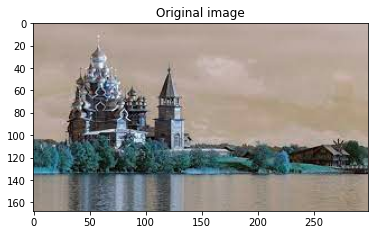

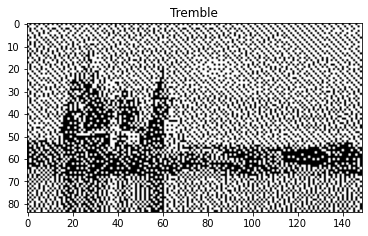

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as mat_plt

image = cv2.imread('./src/img.jpg')
mat_plt.figure()
mat_plt.imshow(image, vmin=0, vmax=255, cmap=mat_plt.get_cmap('Greys'))
mat_plt.title('Original image')

image = cv2.imread('./src/img.jpg', cv2.IMREAD_GRAYSCALE)
image = 255 - image
height, width = image.shape


"""
Тут будет происходить сжатие картинки для последующей работы
"""
image = cv2.resize(image, (width // 2, height // 2))

height, width = image.shape

dither_image = np.column_stack((image, [0] * image.shape[0]))
dither_image = \
    np.append(dither_image, [np.zeros(width + 1, dtype=np.uint8)], axis=0)
dither_image = dither_image.astype(np.float)

for h in range(height):
    for w in range(width):
        old_pixel = dither_image[h, w]
        # Лимит
        new_pixel = 255 if dither_image[h, w] > 96 else 0

        dither_image[h, w] = new_pixel

        err = old_pixel - new_pixel

        if w > 0:
            dither_image[h + 1, w - 1] = dither_image[
                                           h + 1, w - 1] + err * 3 / 16
        dither_image[h + 1, w] = dither_image[h + 1, w] + err * 5 / 16
        dither_image[h, w + 1] = dither_image[h, w + 1] + err * 7 / 16
        dither_image[h + 1, w + 1] = dither_image[h + 1, w + 1] + err * 1 / 16

dither_image = dither_image.astype(np.uint8)
dither_image = dither_image[0:height, 0:width]

mat_plt.figure()
mat_plt.imshow(dither_image, vmin=0, vmax=255, cmap=mat_plt.get_cmap('Greys'))
mat_plt.title('Tremble')

mat_plt.show()